In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [72]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/kishore-
[nltk_data]     pt5635/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [74]:
import re

In [75]:
data = pd.read_csv("TwitterSentiment.csv", encoding="latin", header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [76]:
data.columns = ["sentiment", "tweet_id", "tweet_date", "query", "user_id", "tweet"]
data.head()

,sentiment,tweet_id,tweet_date,query,user_id,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [77]:
data = data.drop(["tweet_id", "tweet_date", "query", "user_id"], axis=1)
data.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [78]:
lab_to_sentiment = {0 : "Negative", 4 : "Positive"}
def label_decoder(label):
    return lab_to_sentiment[label]

data.sentiment = data.sentiment.apply(lambda x : label_decoder(x))
data.head()

,sentiment,tweet
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'sentiment data distribution')

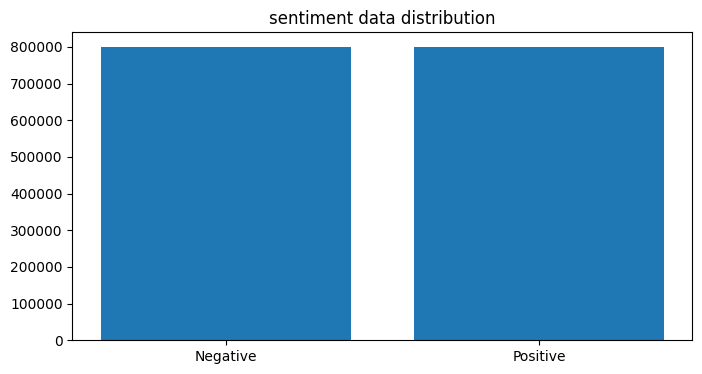

In [79]:
val_count = data.sentiment.value_counts()

plt.figure(figsize=(8, 4))
plt.bar(val_count.index, val_count.values)
plt.title("sentiment data distribution")

In [80]:
import random
random_idx_list = [random.randint(1, len(data.tweet)) for _ in range(10)]

data.loc[random_idx_list,:].head(10)

,sentiment,tweet
1504575,Positive,"@elise91 oh, i forgot about that, lol thanks. ..."
386817,Negative,"@Funkybabygirl Oh mann I'm good thanks, going..."
386353,Negative,Hungry...and someone is so late
342835,Negative,@SirJolt NO! It was so beautiful yesterday but...
1517165,Positive,"@Hollowbabes YAY,well done you.. it`s all dow..."
68515,Negative,@MixedByAli thats dope..yea im bout to hit the...
504233,Negative,@DemiMexicanFans .. petition to have Demi come...
6318,Negative,@joyanne Thanks... Also: argh. And gah. And ...
97194,Negative,So tired!! Almost missed my train today... and...
443787,Negative,"I'm totally cheesed off,the weather blows and ..."


In [81]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [82]:
text_cleaning_regex = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

In [83]:
def preprocess(text, stem = False):
    text = re.sub(text_cleaning_regex, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
        
    return " ".join(tokens)

In [84]:
data.tweet = data.tweet.apply(lambda x: preprocess(x))

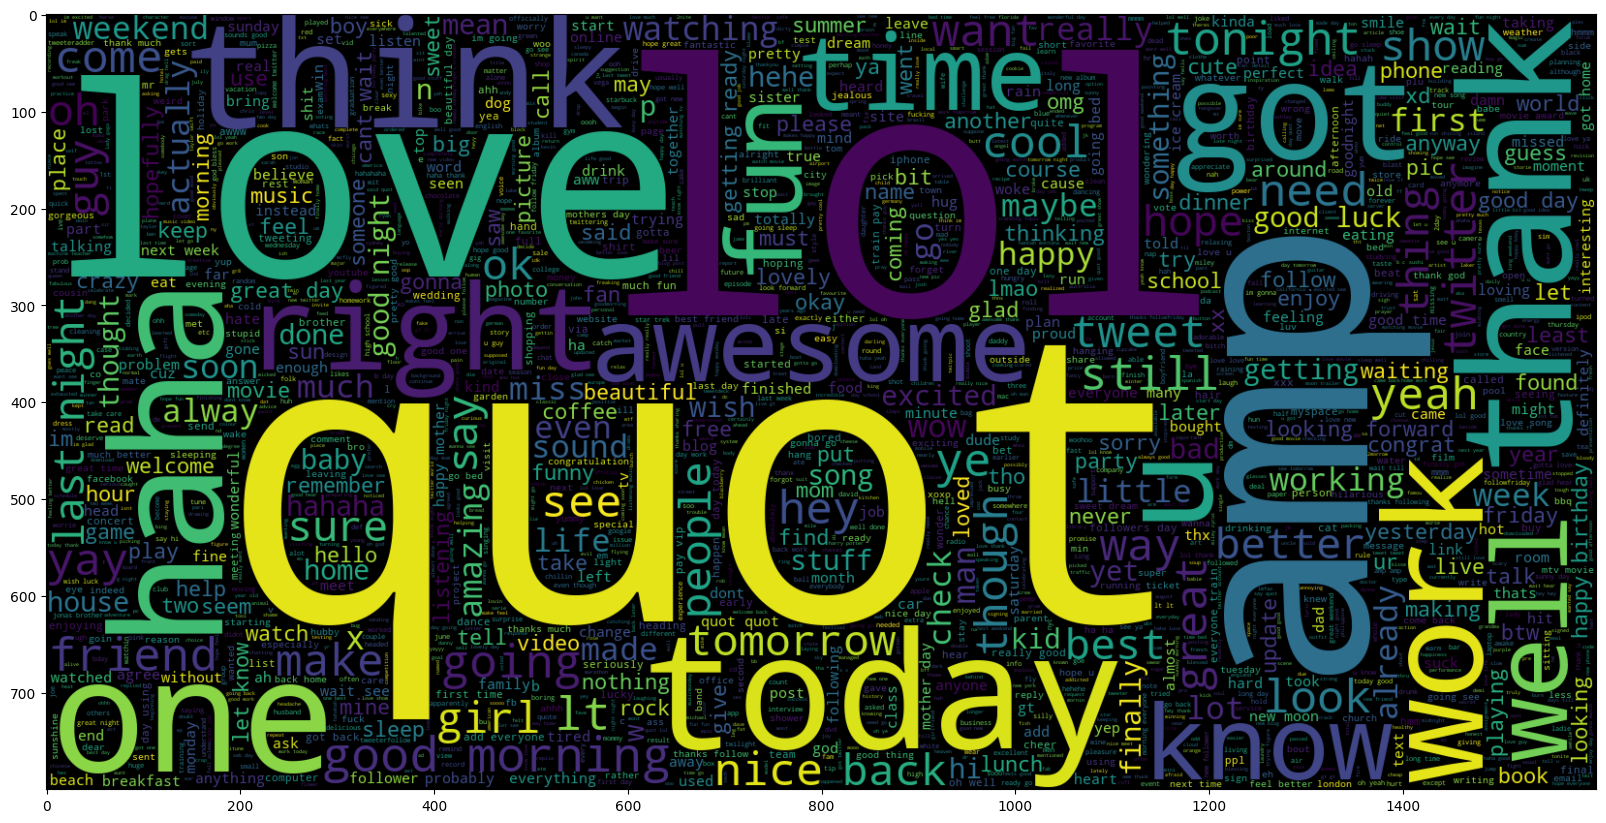

In [85]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data[data.sentiment == "Positive"].tweet))
plt.imshow(wc, interpolation = "bilinear")

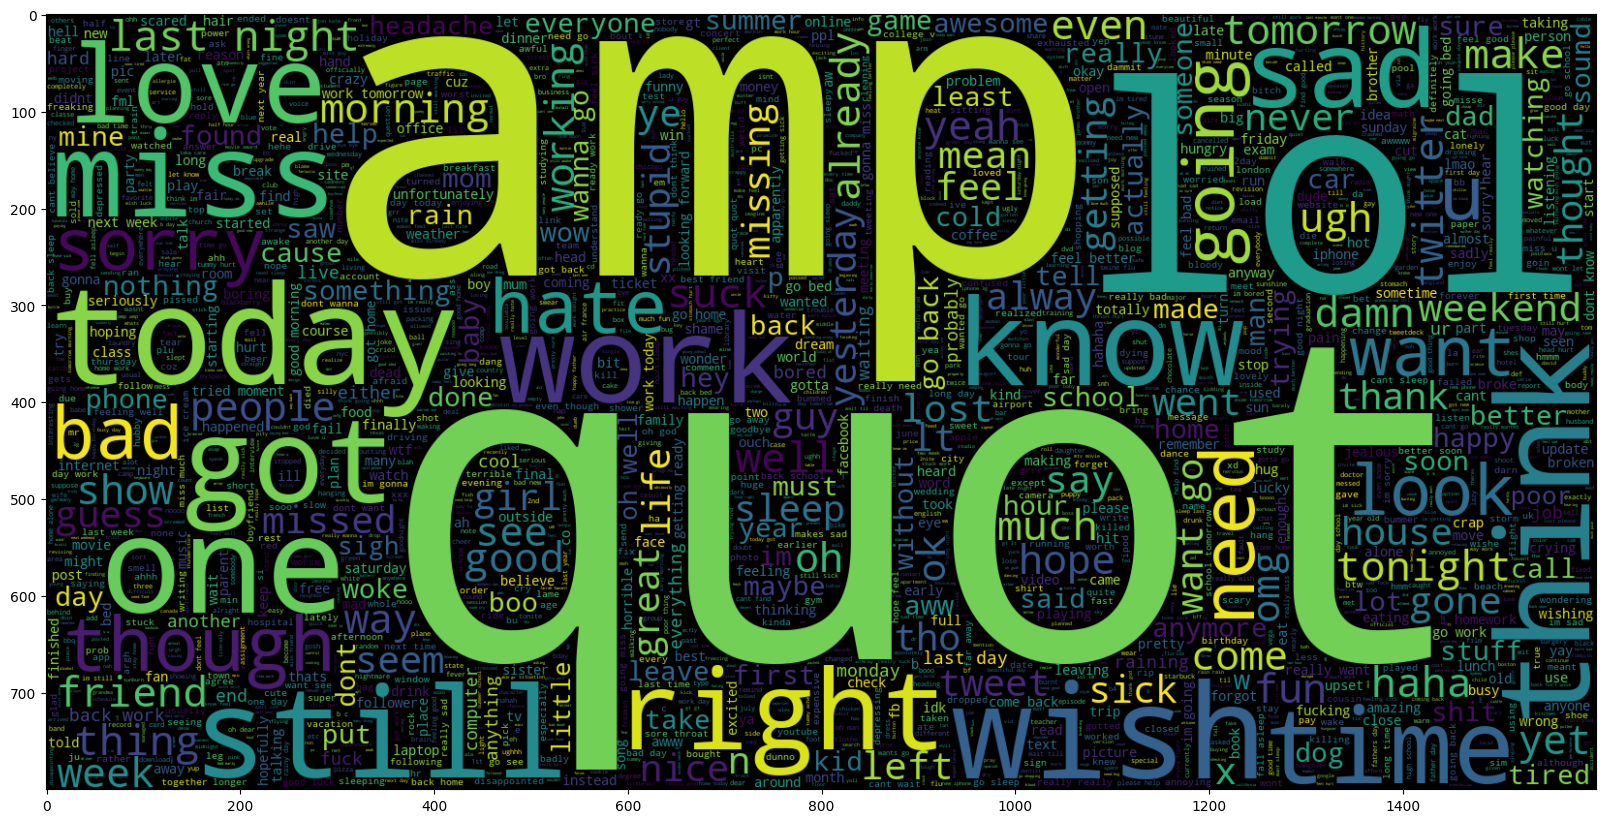

In [86]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(data[data.sentiment == "Negative"].tweet))
plt.imshow(wc, interpolation = "bilinear")

In [87]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [88]:
train_data, test_data = train_test_split(data, test_size = 1 - TRAIN_SIZE, random_state = 7)

In [89]:
print(f"train_data --> {len(train_data)}")
print(f"test_data --> {len(test_data)}")

train_data --> 1280000
test_data --> 320000


In [90]:
train_data.head()

,sentiment,tweet
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...


In [91]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

print(f"vocab size --> {vocab_size}")

vocab size --> 290575


In [92]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet), maxlen = MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet), maxlen = MAX_SEQUENCE_LENGTH)

print(f"X_train shape ---> {X_train.shape}")
print(f"X_test shape ---> {X_test.shape}")

X_train shape ---> (1280000, 30)
X_test shape ---> (320000, 30)


In [93]:
X_train

array([[   0,    0,    0, ...,    0,   34,  110],
       [   0,    0,    0, ...,  133,  220, 2319],
       [   0,    0,    0, ..., 5649, 9960, 1060],
       ...,
       [   0,    0,    0, ...,  118, 1157,  687],
       [   0,    0,    0, ...,    1,  247,  107],
       [   0,    0,    0, ...,  665, 1308, 1868]], dtype=int32)

In [94]:
labels = train_data.sentiment.unique().tolist()

In [95]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.tolist())

y_train = encoder.transform(train_data.sentiment.tolist())
y_test = encoder.transform(test_data.sentiment.tolist())

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"y_train shape --> {y_train.shape}")
print(f"y_test shape ---> {y_test.shape}")

y_train shape --> (1280000, 1)
y_test shape ---> (320000, 1)


In [96]:
import torch

In [124]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

/var/folders/ld/g28cnzf14pgfnzt1qwl4d8cmdnw91k/T/ipykernel_65202/1278055457.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/var/folders/ld/g28cnzf14pgfnzt1qwl4d8cmdnw91k/T/ipykernel_65202/1278055457.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
/var/folders/ld/g28cnzf14pgfnzt1qwl4d8cmdnw91k/T/ipykernel_65202/1278055457.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
/va

In [125]:
print(f"train features shape --> {X_train.shape}")
print(f"test features shape --> {X_test.shape}")
print(f"train target shape --> {y_train.shape}")
print(f"test target shape --> {y_test.shape}")

train features shape --> torch.Size([1280000, 30])
test features shape --> torch.Size([320000, 30])
train target shape --> torch.Size([1280000, 1])
test target shape --> torch.Size([320000, 1])


In [126]:
from torch import nn

class Network(nn.Module):

    def __init__(self, inp_size, out_size, layers):
        super().__init__()

        self.layer_list = []

        for layer in layers:
            self.layer_list.append(nn.Linear(inp_size, layer))
            self.layer_list.append(nn.ReLU())
            inp_size = layer

        self.layer_list.append(nn.Linear(layers[-1], out_size))
        self.layer_list.append(nn.Sigmoid())
    
        self.Net = nn.Sequential(*self.layer_list)

    def forward(self, x):
        out = self.Net(x)
        return out

In [158]:
torch.manual_seed(100)
Net = Network(X_train.shape[1], 1, [150, 120, 100, 80])

In [159]:
Net

Network(
  (Net): Sequential(
    (0): Linear(in_features=30, out_features=150, bias=True)
    (1): ReLU()
    (2): Linear(in_features=150, out_features=120, bias=True)
    (3): ReLU()
    (4): Linear(in_features=120, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=80, bias=True)
    (7): ReLU()
    (8): Linear(in_features=80, out_features=1, bias=True)
    (9): Sigmoid()
  )
)

In [160]:
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(Net.parameters(), lr=0.001)

In [161]:
epochs = 100
final_loss = []

for i in range(epochs):
    Net.train()
    i = i + 1
    y_pred = Net(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if i % 10 == 1:
        print(f"epochs : {i}, loss : {loss}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs : 1, loss : 30.807907104492188
epochs : 11, loss : 12.612375259399414
epochs : 21, loss : 10.967325210571289
epochs : 31, loss : 7.817888259887695
epochs : 41, loss : 10.215153694152832
epochs : 51, loss : 4.2843804359436035
epochs : 61, loss : 3.7954516410827637
epochs : 71, loss : 2.4515061378479004
epochs : 81, loss : 1.25905179977417
epochs : 91, loss : 1.1641546487808228


Text(0.5, 0, 'epoch')

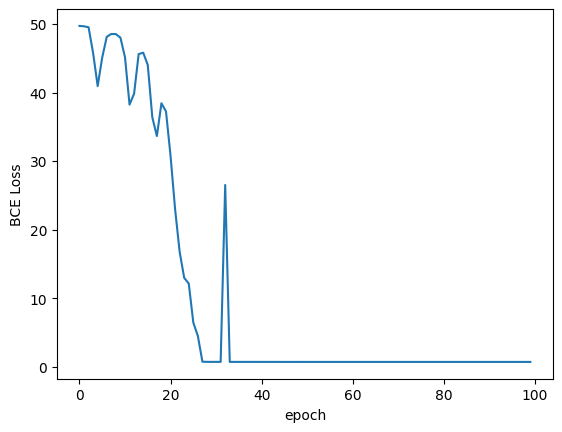

In [140]:
values = [t.item() for t in final_loss]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), values)
plt.ylabel('BCE Loss')
plt.xlabel('epoch')

In [141]:
X_test

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.1470e+03, 9.3400e+02,
         5.4600e+02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 5.7390e+03, 2.4500e+02,
         3.3694e+04],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.6700e+02, 9.5400e+02,
         3.5090e+03],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 9.3300e+02, 6.1900e+02,
         1.9020e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.6990e+03, 4.5800e+02,
         3.1700e+02],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.8250e+03, 1.2000e+01,
         6.9200e+02]])

In [143]:
with torch.no_grad():
    y_pred_test = Net(X_test)
    test_loss = loss_function(y_pred_test, y_test)

print(f"loss ----> {test_loss}")

loss ----> 0.693141758441925


In [151]:
predicted_labels = (y_pred_test >= 0.5).float()
predicted_labels

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [152]:
correct_predictions = (predicted_labels == y_test).sum().item()
correct_predictions

160542

In [153]:
total_predictions = y_test.size(0)
total_predictions

320000

In [155]:
accuracy = correct_predictions / total_predictions
print(f"accuracy : {accuracy :.2%}")

accuracy : 50.17%
